In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv('/kaggle/input/hotel-dataset/hotel_bookings.csv')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103050 entries, 0 to 103049
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103050 non-null  object 
 1   is_canceled                     103050 non-null  int64  
 2   lead_time                       103050 non-null  int64  
 3   arrival_date_year               103050 non-null  int64  
 4   arrival_date_month              103050 non-null  object 
 5   arrival_date_week_number        102204 non-null  float64
 6   arrival_date_day_of_month       103050 non-null  int64  
 7   stays_in_weekend_nights         103050 non-null  int64  
 8   stays_in_week_nights            103050 non-null  int64  
 9   adults                          103048 non-null  float64
 10  children                        103048 non-null  float64
 11  babies                          103050 non-null  int64  
 12  meal            

In [118]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [119]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,13,2015,July,27.0,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,14,2015,July,27.0,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
2,Resort Hotel,0,14,2015,July,27.0,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,9,2015,July,27.0,1,0,2,2.0,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
4,Resort Hotel,1,85,2015,July,27.0,1,0,3,2.0,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06


In [120]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,103050.000000,103050.000000,103050.000000,102204.000000,103050.000000,103050.000000,103050.000000,103048.000000,103048.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,217.000000,103050.000000,103050.000000,103050.000000,103050.000000
mean,0.390044,111.672256,2016.156487,27.340368,15.784066,0.977875,2.589355,1.899464,0.111142,0.007686,0.014022,0.077215,0.024862,0.201698,86.693382,262.105991,2.615614,104.618808,0.053217,0.605376
std,0.487762,107.671497,0.706228,13.287969,8.793996,1.003935,1.905760,0.491057,0.411817,0.097016,0.117583,0.757682,0.436635,0.624792,110.774548,103.602708,18.783482,50.034464,0.225717,0.799216
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,281.000000,0.000000,72.800000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,281.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,281.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,499.000000,391.000000,5400.000000,3.000000,5.000000


In [121]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number             846
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 2
children                               2
babies                                 0
meal                                   0
country                              153
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [122]:
missing_percentages = df.isnull().mean()
missing_percentages

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.008210
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000019
children                          0.000019
babies                            0.000000
meal                              0.000000
country                           0.001485
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [123]:
columns_to_delete = missing_percentages[missing_percentages > .9].index
columns_to_delete

Index(['company'], dtype='object')

In [124]:
df.drop(columns = columns_to_delete, inplace = True)

In [125]:
df.columns[df[df.adults.isna()].isna().sum() == df.adults.isna().sum()]

Index(['adults', 'children', 'customer_type'], dtype='object')

In [126]:
df.dropna(subset = ['adults'],  inplace = True)

In [127]:
mean = df.groupby('arrival_date_month')['arrival_date_week_number'].transform('mean')
df['arrival_date_week_number'].fillna(mean.astype('int64'))

0         27.0
1         27.0
2         27.0
3         27.0
4         27.0
          ... 
103045    35.0
103046    35.0
103047    35.0
103048    35.0
103049    35.0
Name: arrival_date_week_number, Length: 103048, dtype: float64

In [128]:
median = df.groupby('arrival_date_month')['arrival_date_week_number'].transform('median')
df['arrival_date_week_number'].fillna(median.astype('int64'), inplace = True)

/tmp/ipykernel_31/3111536801.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [129]:
df = df.dropna(subset=['country'])

In [130]:
df.isna().sum().sum()

0

In [131]:
Q1, Q2, Q3 = df.stays_in_week_nights.quantile([0.25, 0.5, 0.75]) 

IQR = Q3 - Q1

df['stays_in_week_nights_outlier'] = df['stays_in_week_nights'].apply(lambda p: (p > Q3 + 1.5 * IQR) or (p < Q1 - 1.5 * IQR))

df[['stays_in_week_nights', 'stays_in_week_nights_outlier']].sample(10)

,stays_in_week_nights,stays_in_week_nights_outlier
64064,2,False
688,5,False
82424,5,False
14494,6,False
62055,6,False
9774,3,False
12271,5,False
32348,1,False
70384,1,False
38358,0,False


In [132]:
import plotly.express as px 
 
fig = px.box(df, y='stays_in_week_nights') 

fig.update_traces(marker_color='#FF851B')

fig.update_layout(autosize=False, width=600, height=500, title='Detected Outliers') 

plt.savefig("outliers_boxplot.jpg")

fig.show()


<Figure size 640x480 with 0 Axes>

In [133]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102895.000000,102895.000000,102895.000000,102895.000000,102895.000000,102895.000000,102895.000000,102895.000000,102895.00000,102895.000000,102895.000000,102895.000000,102895.000000,102895.000000,102895.000000,102895.000000,102895.000000,102895.000000,102895.000000
mean,0.390311,111.739084,2016.156976,27.339113,15.786841,0.978182,2.589650,1.899927,0.11123,0.007697,0.014034,0.077215,0.024365,0.201779,86.549026,2.619554,104.679899,0.053035,0.605452
std,0.487822,107.680975,0.706113,13.279891,8.794028,1.003987,1.905933,0.490889,0.41198,0.097089,0.117630,0.758182,0.435757,0.624951,110.719392,18.797350,50.021454,0.225358,0.799340
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.00000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [134]:
df[df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_in_week_nights_outlier
2711,Resort Hotel,0,36,2015,November,47.0,20,1,2,0.0,...,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,False
3133,Resort Hotel,0,165,2015,December,53.0,30,1,4,0.0,...,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,False
3156,Resort Hotel,0,165,2015,December,53.0,30,2,4,0.0,...,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,False
25376,Resort Hotel,0,4,2017,January,2.0,14,0,1,0.0,...,No Deposit,168.0,0,Transient-Party,0.00,0,0,Check-Out,2017-01-15,False
32178,City Hotel,0,132,2015,July,30.0,23,2,5,0.0,...,No Deposit,1.0,0,Transient-Party,0.00,0,0,Check-Out,2015-07-30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100893,City Hotel,0,329,2017,July,30.0,24,1,5,0.0,...,No Deposit,9.0,0,Transient,91.85,0,3,Check-Out,2017-07-30,False
100964,City Hotel,0,296,2017,July,30.0,27,1,3,0.0,...,No Deposit,9.0,0,Transient,98.85,0,1,Check-Out,2017-07-31,False
101029,City Hotel,0,276,2017,July,31.0,30,2,1,0.0,...,No Deposit,9.0,0,Transient,93.64,0,2,Check-Out,2017-08-02,False
101054,City Hotel,0,291,2017,July,30.0,29,2,2,0.0,...,No Deposit,9.0,0,Transient,98.85,0,1,Check-Out,2017-08-02,False


In [135]:
df.drop(df[df['adults'] == 0].index, inplace = True)

In [136]:
data = df
newdata = df

In [137]:
df['kids'] = df['children'] + df['babies']
df.drop(columns = ['children', 'babies'], inplace = True)

In [138]:
df['family'] = np.where(df['kids'] > 0 , 1 , 0)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



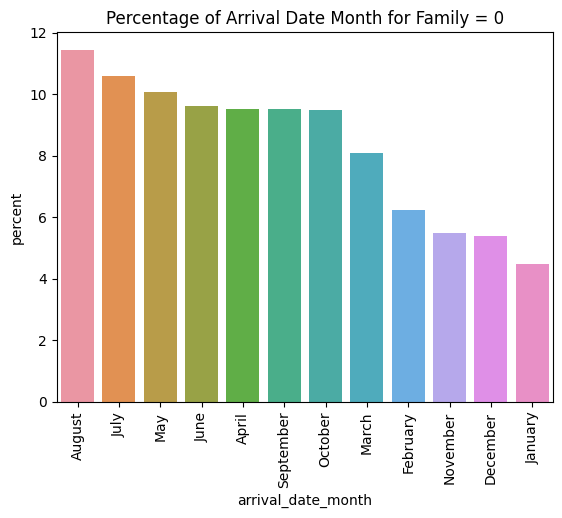

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



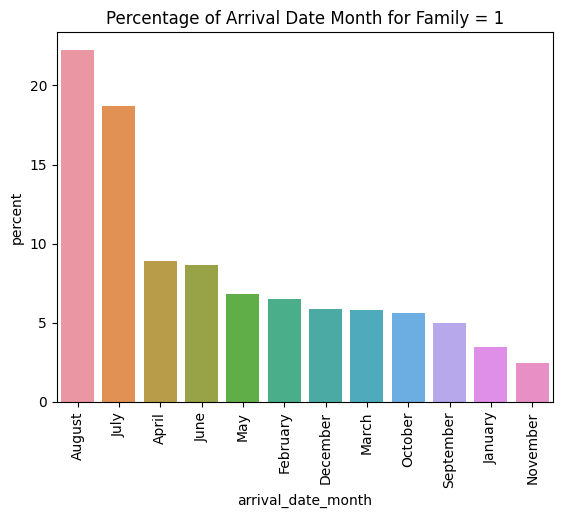

In [139]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

family_0 = df[df['family'] == 0]
family_0_counts = family_0['arrival_date_month'].value_counts(normalize=True) * 100
family_0_counts = family_0_counts.reset_index()
family_0_counts.columns = ['arrival_date_month', 'percent']

family_1 = df[df['family'] == 1]
family_1_counts = family_1['arrival_date_month'].value_counts(normalize=True) * 100
family_1_counts = family_1_counts.reset_index()
family_1_counts.columns = ['arrival_date_month', 'percent']

sns.barplot(data=family_0_counts, x='arrival_date_month', y='percent')
plt.title('Percentage of Arrival Date Month for Family = 0')
plt.xticks(rotation=90)

plt.savefig("Percentage_of_Arrival_Date_Month_for_Family_0.png")
plt.show()

sns.barplot(data=family_1_counts, x='arrival_date_month', y='percent')
plt.title('Percentage of Arrival Date Month for Family = 1')
plt.xticks(rotation=90)

plt.savefig("Percentage_of_Arrival_Date_Month_for_Family_1.png")
plt.show()

In [140]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



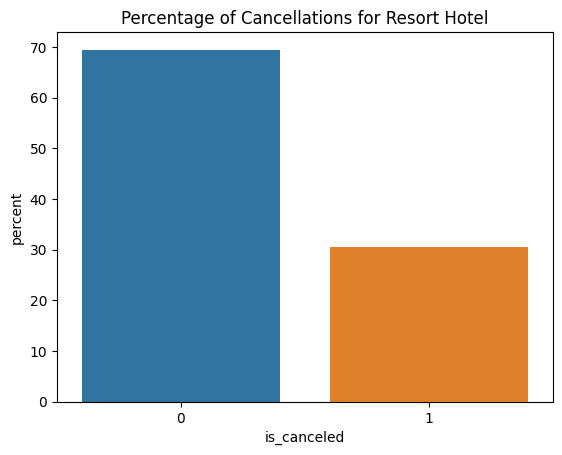

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



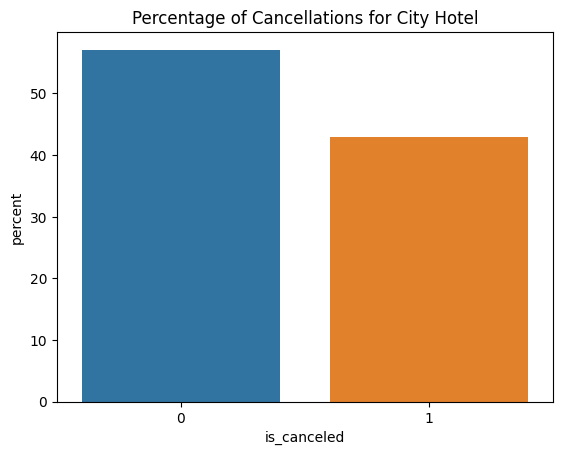

In [141]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel_counts = resort_hotel['is_canceled'].value_counts(normalize=True) * 100
resort_hotel_counts = resort_hotel_counts.reset_index()
resort_hotel_counts.columns = ['is_canceled', 'percent']

city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel_counts = city_hotel['is_canceled'].value_counts(normalize=True) * 100
city_hotel_counts = city_hotel_counts.reset_index()
city_hotel_counts.columns = ['is_canceled', 'percent']

sns.barplot(data=resort_hotel_counts, x='is_canceled', y='percent')

plt.title('Percentage of Cancellations for Resort Hotel')
plt.savefig("Percentage_of_Cancellations_for_Resort_Hotel.png")
plt.show()

sns.barplot(data=city_hotel_counts, x='is_canceled', y='percent')

plt.title('Percentage of Cancellations for City Hotel')
plt.savefig("Percentage_of_Cancellations_for_City_Hotel.png")
plt.show()

In [142]:
df['lead_time'].describe()

count    102569.000000
mean        111.768917
std         107.708088
min           0.000000
25%          26.000000
50%          79.000000
75%         169.000000
max         629.000000
Name: lead_time, dtype: float64

In [143]:
bins = [df['lead_time'].min(), 7, 14, 30, 90, 120, 365, df['lead_time'].max()]
df['lead_time_bins'] = pd.cut(df['lead_time'], bins)

maps = ['less than a week', 'less than 2 weeks', 
        'less than a month', 'less than 3 months', 'less than 6 months',
        'less than a year', 'more than a year']

map_dict = {bin: label for bin, label in zip(df['lead_time_bins'].sort_values().unique(), maps)}
df['lead_time_bins'] = df['lead_time_bins'].map(map_dict)


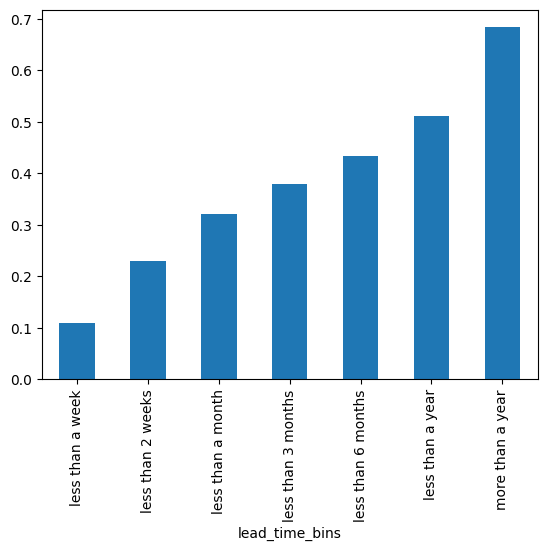

In [144]:
grouped = df.groupby('lead_time_bins', observed=True)['is_canceled'].mean()
grouped.plot(kind='bar');
plt.savefig("lead_time_bin.png")

In [145]:
print(newdata.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0         13               2015               July   
1  Resort Hotel            0         14               2015               July   
2  Resort Hotel            0         14               2015               July   
3  Resort Hotel            0          9               2015               July   
4  Resort Hotel            1         85               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                      27.0                          1   
1                      27.0                          1   
2                      27.0                          1   
3                      27.0                          1   
4                      27.0                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ... customer_type  \
0                        0                     1     1.0  ...     Transient   
1     

In [146]:
newdata = newdata.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','total_of_special_requests','reservation_status','reservation_status_date','stays_in_week_nights_outlier','lead_time_bins'], axis=1)
print(newdata.head())

          hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0         13               July   
1  Resort Hotel            0         14               July   
2  Resort Hotel            0         14               July   
3  Resort Hotel            0          9               July   
4  Resort Hotel            1         85               July   

   stays_in_weekend_nights  stays_in_week_nights  adults meal country  \
0                        0                     1     1.0   BB     GBR   
1                        0                     2     2.0   BB     GBR   
2                        0                     2     2.0   BB     GBR   
3                        0                     2     2.0   FB     PRT   
4                        0                     3     2.0   BB     PRT   

  market_segment  ... assigned_room_type  booking_changes  deposit_type  \
0      Corporate  ...                  A                0    No Deposit   
1      Online TA  ...                 

In [147]:
newdata = newdata.drop(['assigned_room_type'], axis=1)
print(newdata.head())

          hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0         13               July   
1  Resort Hotel            0         14               July   
2  Resort Hotel            0         14               July   
3  Resort Hotel            0          9               July   
4  Resort Hotel            1         85               July   

   stays_in_weekend_nights  stays_in_week_nights  adults meal country  \
0                        0                     1     1.0   BB     GBR   
1                        0                     2     2.0   BB     GBR   
2                        0                     2     2.0   BB     GBR   
3                        0                     2     2.0   FB     PRT   
4                        0                     3     2.0   BB     PRT   

  market_segment  ... reserved_room_type  booking_changes  deposit_type  \
0      Corporate  ...                  A                0    No Deposit   
1      Online TA  ...                 

In [148]:
print(newdata.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'kids', 'family']


In [149]:
newdata = newdata.drop(['previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list'], axis=1)
print(newdata.head())

          hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0         13               July   
1  Resort Hotel            0         14               July   
2  Resort Hotel            0         14               July   
3  Resort Hotel            0          9               July   
4  Resort Hotel            1         85               July   

   stays_in_weekend_nights  stays_in_week_nights  adults meal country  \
0                        0                     1     1.0   BB     GBR   
1                        0                     2     2.0   BB     GBR   
2                        0                     2     2.0   BB     GBR   
3                        0                     2     2.0   FB     PRT   
4                        0                     3     2.0   BB     PRT   

  market_segment distribution_channel  is_repeated_guest reserved_room_type  \
0      Corporate            Corporate                  0                  A   
1      Online TA              

In [150]:
print(newdata.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'deposit_type', 'agent', 'customer_type', 'adr', 'required_car_parking_spaces', 'kids', 'family']


In [151]:
def categorize_week_nights(value):
    if value < 1:
        return 'low'
    elif 1 <= value < 3:
        return 'medium'
    else:
        return 'high'

newdata['week_nights_category'] = newdata['stays_in_week_nights'].apply(categorize_week_nights)
lead_time_mean = newdata['lead_time'].mean()
newdata['lead_time'] = np.where(newdata['lead_time'] < lead_time_mean, 'low', 'high')
print(newdata.head())

          hotel  is_canceled lead_time arrival_date_month  \
0  Resort Hotel            0       low               July   
1  Resort Hotel            0       low               July   
2  Resort Hotel            0       low               July   
3  Resort Hotel            0       low               July   
4  Resort Hotel            1       low               July   

   stays_in_weekend_nights  stays_in_week_nights  adults meal country  \
0                        0                     1     1.0   BB     GBR   
1                        0                     2     2.0   BB     GBR   
2                        0                     2     2.0   BB     GBR   
3                        0                     2     2.0   FB     PRT   
4                        0                     3     2.0   BB     PRT   

  market_segment  ... is_repeated_guest  reserved_room_type deposit_type  \
0      Corporate  ...                 0                   A   No Deposit   
1      Online TA  ...                 0   

In [152]:
newdata = newdata.drop(['stays_in_week_nights'], axis=1)
print(newdata.head())

          hotel  is_canceled lead_time arrival_date_month  \
0  Resort Hotel            0       low               July   
1  Resort Hotel            0       low               July   
2  Resort Hotel            0       low               July   
3  Resort Hotel            0       low               July   
4  Resort Hotel            1       low               July   

   stays_in_weekend_nights  adults meal country market_segment  \
0                        0     1.0   BB     GBR      Corporate   
1                        0     2.0   BB     GBR      Online TA   
2                        0     2.0   BB     GBR      Online TA   
3                        0     2.0   FB     PRT         Direct   
4                        0     2.0   BB     PRT      Online TA   

  distribution_channel  is_repeated_guest reserved_room_type deposit_type  \
0            Corporate                  0                  A   No Deposit   
1                TA/TO                  0                  A   No Deposit   
2    

In [153]:
newdata = newdata.drop(['agent'], axis=1)
print(newdata.head())

          hotel  is_canceled lead_time arrival_date_month  \
0  Resort Hotel            0       low               July   
1  Resort Hotel            0       low               July   
2  Resort Hotel            0       low               July   
3  Resort Hotel            0       low               July   
4  Resort Hotel            1       low               July   

   stays_in_weekend_nights  adults meal country market_segment  \
0                        0     1.0   BB     GBR      Corporate   
1                        0     2.0   BB     GBR      Online TA   
2                        0     2.0   BB     GBR      Online TA   
3                        0     2.0   FB     PRT         Direct   
4                        0     2.0   BB     PRT      Online TA   

  distribution_channel  is_repeated_guest reserved_room_type deposit_type  \
0            Corporate                  0                  A   No Deposit   
1                TA/TO                  0                  A   No Deposit   
2    

In [154]:
newdata = newdata.drop(['family'], axis=1)
print(newdata.head())

          hotel  is_canceled lead_time arrival_date_month  \
0  Resort Hotel            0       low               July   
1  Resort Hotel            0       low               July   
2  Resort Hotel            0       low               July   
3  Resort Hotel            0       low               July   
4  Resort Hotel            1       low               July   

   stays_in_weekend_nights  adults meal country market_segment  \
0                        0     1.0   BB     GBR      Corporate   
1                        0     2.0   BB     GBR      Online TA   
2                        0     2.0   BB     GBR      Online TA   
3                        0     2.0   FB     PRT         Direct   
4                        0     2.0   BB     PRT      Online TA   

  distribution_channel  is_repeated_guest reserved_room_type deposit_type  \
0            Corporate                  0                  A   No Deposit   
1                TA/TO                  0                  A   No Deposit   
2    

In [155]:
newdata = newdata.drop(['deposit_type'], axis=1)
print(newdata.head())

          hotel  is_canceled lead_time arrival_date_month  \
0  Resort Hotel            0       low               July   
1  Resort Hotel            0       low               July   
2  Resort Hotel            0       low               July   
3  Resort Hotel            0       low               July   
4  Resort Hotel            1       low               July   

   stays_in_weekend_nights  adults meal country market_segment  \
0                        0     1.0   BB     GBR      Corporate   
1                        0     2.0   BB     GBR      Online TA   
2                        0     2.0   BB     GBR      Online TA   
3                        0     2.0   FB     PRT         Direct   
4                        0     2.0   BB     PRT      Online TA   

  distribution_channel  is_repeated_guest reserved_room_type customer_type  \
0            Corporate                  0                  A     Transient   
1                TA/TO                  0                  A     Transient   
2 

In [156]:
adr_mean = newdata['adr'].mean()
newdata['adr'] = np.where(newdata['adr'] < adr_mean, 'low', 'high')
print(newdata.head())

          hotel  is_canceled lead_time arrival_date_month  \
0  Resort Hotel            0       low               July   
1  Resort Hotel            0       low               July   
2  Resort Hotel            0       low               July   
3  Resort Hotel            0       low               July   
4  Resort Hotel            1       low               July   

   stays_in_weekend_nights  adults meal country market_segment  \
0                        0     1.0   BB     GBR      Corporate   
1                        0     2.0   BB     GBR      Online TA   
2                        0     2.0   BB     GBR      Online TA   
3                        0     2.0   FB     PRT         Direct   
4                        0     2.0   BB     PRT      Online TA   

  distribution_channel  is_repeated_guest reserved_room_type customer_type  \
0            Corporate                  0                  A     Transient   
1                TA/TO                  0                  A     Transient   
2 

In [157]:
weekend_mean = newdata['stays_in_weekend_nights'].mean()
newdata['stays_in_weekend_nights'] = np.where(newdata['stays_in_weekend_nights'] < weekend_mean, 'low', 'high')
print(newdata.head())

          hotel  is_canceled lead_time arrival_date_month  \
0  Resort Hotel            0       low               July   
1  Resort Hotel            0       low               July   
2  Resort Hotel            0       low               July   
3  Resort Hotel            0       low               July   
4  Resort Hotel            1       low               July   

  stays_in_weekend_nights  adults meal country market_segment  \
0                     low     1.0   BB     GBR      Corporate   
1                     low     2.0   BB     GBR      Online TA   
2                     low     2.0   BB     GBR      Online TA   
3                     low     2.0   FB     PRT         Direct   
4                     low     2.0   BB     PRT      Online TA   

  distribution_channel  is_repeated_guest reserved_room_type customer_type  \
0            Corporate                  0                  A     Transient   
1                TA/TO                  0                  A     Transient   
2       

In [158]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def encode_categorical(newdata):
    result = pd.DataFrame()
    for col in newdata.columns:
        dummies = pd.get_dummies(newdata[col], prefix=col, prefix_sep='_')
        result = pd.concat([result, dummies], axis=1)
    return result

encoded_df = encode_categorical(newdata)
min_support_value = 0.1  
frequent_itemsets = apriori(encoded_df, 
                           min_support=min_support_value, 
                           use_colnames=True,
                           max_len=3) 
min_confidence = 0.6  
rules = association_rules(frequent_itemsets,
                         metric="confidence",
                         min_threshold=min_confidence)
rules_gbr = rules[rules['antecedents'].apply(lambda x: 'country_GBR' in x)]
rules_resort = rules[rules['consequents'].apply(lambda x: 'hotel_Resort Hotel' in x)]
interesting_filtered = rules[
    rules['antecedents'].apply(lambda x: 'country_GBR' in x) &
    rules['consequents'].apply(lambda x: 'hotel_Resort Hotel' in x)
]
print(f"Found {len(frequent_itemsets)} frequent itemsets")
print(f"Generated {len(rules)} association rules")
interesting_rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False]).head(20)
print("\nTop 20 rules by confidence and lift:")
print(interesting_rules)


Found 1841 frequent itemsets
Generated 3701 association rules

Top 20 rules by confidence and lift:
                                        antecedents  \
72                                  (is_canceled_1)   
347               (hotel_City Hotel, is_canceled_1)   
1324                (lead_time_high, is_canceled_1)   
1334                 (lead_time_low, is_canceled_1)   
1344  (stays_in_weekend_nights_high, is_canceled_1)   
1354   (stays_in_weekend_nights_low, is_canceled_1)   
1377                    (adults_2.0, is_canceled_1)   
1403                       (is_canceled_1, meal_BB)   
1425                   (is_canceled_1, country_PRT)   
1439      (market_segment_Online TA, is_canceled_1)   
1453    (is_canceled_1, distribution_channel_TA/TO)   
1469           (is_repeated_guest_0, is_canceled_1)   
1481          (reserved_room_type_A, is_canceled_1)   
1492       (is_canceled_1, customer_type_Transient)   
1500                      (adr_high, is_canceled_1)   
1502                

/tmp/ipykernel_31/1408104179.py:21: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



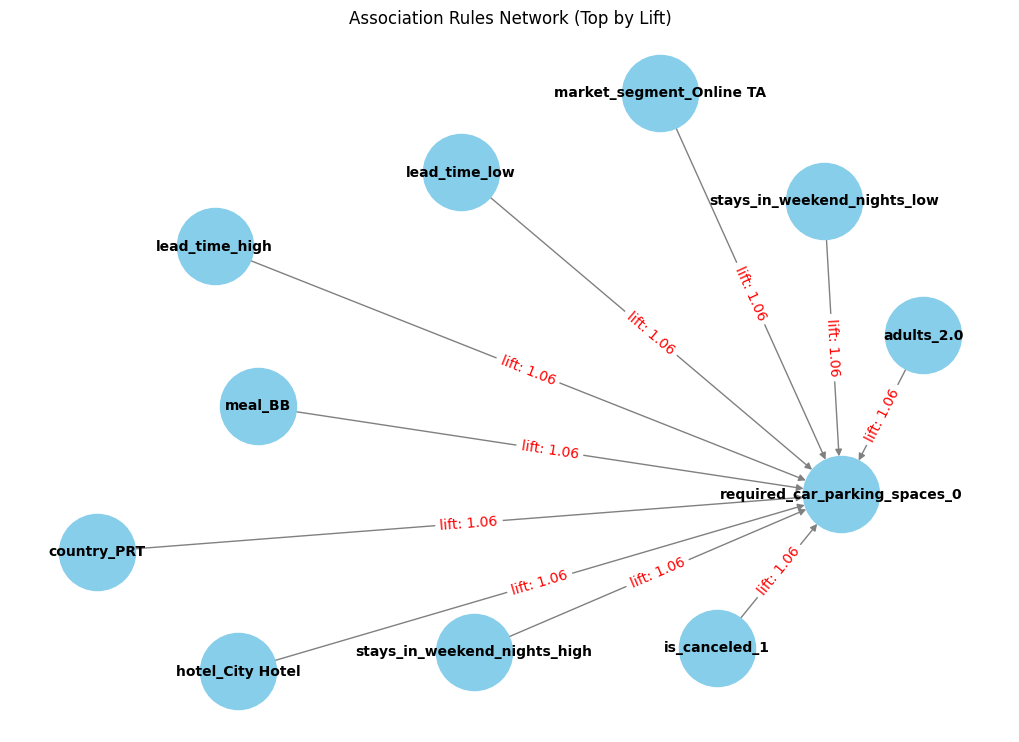

In [159]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_rules(rules_df, top_n=10):
    G = nx.DiGraph()
    rules_to_plot = rules_df.sort_values(by='lift', ascending=False).head(top_n)
    for _, row in rules_to_plot.iterrows():
        for antecedent in row['antecedents']:
            for consequent in row['consequents']:
                G.add_edge(antecedent, consequent, weight=row['lift'])
    pos = nx.spring_layout(G, k=1.5) 
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: f"lift: {v:.2f}" for k, v in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title("Association Rules Network (Top by Lift)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_rules(interesting_rules)


In [160]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def encode_categorical(newdata):
    result = pd.DataFrame()
    for col in newdata.columns:
        dummies = pd.get_dummies(newdata[col], prefix=col, prefix_sep='_')
        result = pd.concat([result, dummies], axis=1)
    return result

encoded_df = encode_categorical(newdata)
frequent_itemsets = apriori(encoded_df, 
                           min_support=0.1,  
                           use_colnames=True,
                           max_len=4,         
                           low_memory=True)   
rules = association_rules(frequent_itemsets,
                         metric="confidence",
                         min_threshold=0.6)   
interesting_rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False]).head(20)

print(f"Found {len(frequent_itemsets)} frequent itemsets")
print(f"Generated {len(rules)} meaningful rules\n")
print("Top 20 intresting patterns:")
print(interesting_rules)

Found 6230 frequent itemsets
Generated 22875 meaningful rules

Top 20 intresting patterns:
                                             antecedents  \
10914                      (lead_time_high, country_PRT)   
10906                      (lead_time_high, country_PRT)   
20389                            (market_segment_Groups)   
20431                            (market_segment_Groups)   
20438                            (market_segment_Groups)   
20387  (market_segment_Groups, distribution_channel_T...   
20410                            (market_segment_Groups)   
20429  (market_segment_Groups, required_car_parking_s...   
20436                  (market_segment_Groups, kids_0.0)   
2959                             (market_segment_Groups)   
20408       (is_repeated_guest_0, market_segment_Groups)   
10867                      (lead_time_high, country_PRT)   
11951                           (adr_low, is_canceled_1)   
10908  (lead_time_high, country_PRT, customer_type_Tr...   
4278     

/tmp/ipykernel_31/2982486847.py:20: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



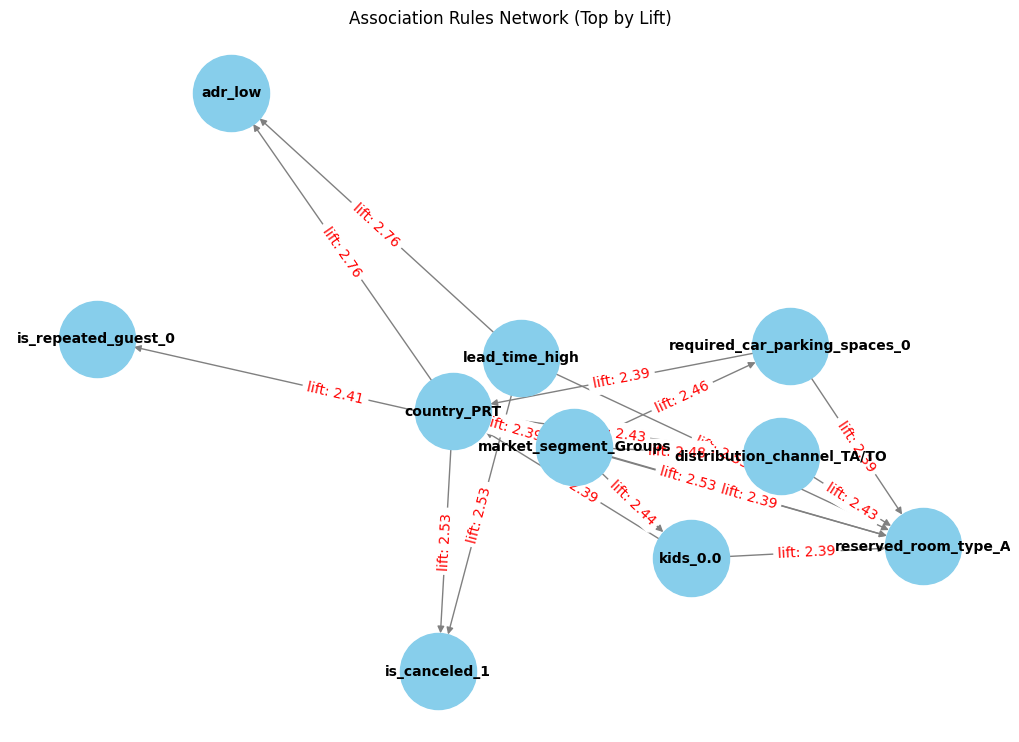

In [161]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_rules(rules_df, top_n=10):
    G = nx.DiGraph()
    rules_to_plot = rules_df.sort_values(by='lift', ascending=False).head(top_n)
    for _, row in rules_to_plot.iterrows():
        for antecedent in row['antecedents']:
            for consequent in row['consequents']:
                G.add_edge(antecedent, consequent, weight=row['lift'])
    pos = nx.spring_layout(G, k=1.5)  
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: f"lift: {v:.2f}" for k, v in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title("Association Rules Network (Top by Lift)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()   
draw_rules(interesting_rules)


In [162]:
# Adults
rules_with_adults = rules[
    rules['antecedents'].apply(lambda items: any('adults_' in str(item) for item in items))
]
print("🔹 Top 5 Rules with 'adults_' in Antecedents:")
print(rules_with_adults.sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))

# Country
rules_with_country = rules[
    rules['antecedents'].apply(lambda items: any('country_' in str(item) for item in items))
]
print("\n🔹 Top 5 Rules with 'country_' in Antecedents:")
print(rules_with_country.sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))

# Reserved Room Type
rules_with_rrtype = rules[
    rules['antecedents'].apply(lambda items: any('reserved_room_type_' in str(item) for item in items))
]
print("\n🔹 Top 5 Rules with 'reserved_room_type_' in Antecedents:")
print(rules_with_rrtype.sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))

# ADR
rules_with_adr = rules[
    rules['antecedents'].apply(lambda items: any('adr_' in str(item) for item in items))
]
print("\n🔹 Top 5 Rules with 'adr_' in Antecedents:")
print(rules_with_adr.sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))

# Customer Type
rules_with_custype = rules[
    rules['antecedents'].apply(lambda items: any('customer_type_' in str(item) for item in items))
]
print("\n🔹 Top 5 Rules with 'customer_type_' in Antecedents:")
print(rules_with_custype.sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))

# Market Segment
rules_with_marketseg = rules[
    rules['antecedents'].apply(lambda items: any('market_segment_' in str(item) for item in items))
]
print("\n🔹 Top 5 Rules with 'market_segment_' in Antecedents:")
print(rules_with_marketseg.sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))


🔹 Top 5 Rules with 'adults_' in Antecedents:
                                             antecedents      consequents  \
10835          (adults_2.0, lead_time_high, country_PRT)  (is_canceled_1)   
11418               (adults_2.0, adr_low, is_canceled_1)    (country_PRT)   
4168         (adults_2.0, hotel_City Hotel, country_PRT)  (is_canceled_1)   
10834        (adults_2.0, lead_time_high, is_canceled_1)    (country_PRT)   
11435  (adults_2.0, is_canceled_1, week_nights_catego...    (country_PRT)   

       antecedent support  consequent support   support  confidence      lift  \
10835            0.141242            0.390674  0.119364    0.845103  2.163193   
11418            0.189775            0.365530  0.138073    0.727562  1.990434   
4168             0.189219            0.390674  0.138677    0.732894  1.875974   
10834            0.174614            0.365530  0.119364    0.683585  1.870121   
11435            0.179898            0.365530  0.121177    0.673586  1.842766   

     

In [163]:
# Is Repeated Guest
rules_with_isrepguest = rules[
    rules['consequents'].apply(lambda items: any('is_repeated_guest_' in str(item) for item in items))
]
print("🔹 Top 5 Rules with 'is_repeated_guest_' in Consequents:")
print(rules_with_isrepguest.sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))

# Is Canceled
rules_with_iscanceled = rules[
    rules['consequents'].apply(lambda items: any('is_canceled_' in str(item) for item in items))
]
print("\n🔹 Top 5 Rules with 'is_canceled_' in Consequents:")
print(rules_with_iscanceled
      .sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))

# Reserved Room Type
rules_with_rrtype = rules[
    rules['consequents'].apply(lambda items: any('reserved_room_type_' in str(item) for item in items))
]
print("\n🔹 Top 5 Rules with 'reserved_room_type_' in Consequents:")
print(rules_with_rrtype.sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))

# ADR
rules_with_adr = rules[
    rules['consequents'].apply(lambda items: any('adr_' in str(item) for item in items))
]
print("\n🔹 Top 5 Rules with 'adr_' in Consequents:")
print(rules_with_adr.sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))

# Market Segment
rules_with_marketseg = rules[
    rules['consequents'].apply(lambda items: any('market_segment_' in str(item) for item in items))
]
print("\n🔹 Top 5 Rules with 'market_segment_' in Consequents:")
print(rules_with_marketseg.sort_values(['lift', 'confidence'], ascending=[False, False]).head(5))


🔹 Top 5 Rules with 'is_repeated_guest_' in Consequents:
                         antecedents  \
20410        (market_segment_Groups)   
20424        (market_segment_Groups)   
20382        (market_segment_Groups)   
20417        (market_segment_Groups)   
10900  (lead_time_high, country_PRT)   

                                             consequents  antecedent support  \
20410  (reserved_room_type_A, is_repeated_guest_0, co...            0.152531   
20424       (is_repeated_guest_0, country_PRT, kids_0.0)            0.152531   
20382  (is_repeated_guest_0, country_PRT, distributio...            0.152531   
20417  (is_repeated_guest_0, required_car_parking_spa...            0.152531   
10900               (is_repeated_guest_0, is_canceled_1)            0.168199   

       consequent support   support  confidence      lift  representativity  \
20410            0.289113  0.106319    0.697028  2.410921               1.0   
20424            0.333200  0.109019    0.714733  2.145057       